### 10. Linear Regression

In [ ]:
# Gradient descent based learning
# 실제 값과 학습된 모델의 예측 값의 오차를 최소로 만들기 위한 최적의 parameter 찾는게 목적

# probability theory based learning
# information theory based learning
# distance similarity based learning

In [ ]:
# Regression : 실수값의 범위에서 실수값을 예측하는 방법

#### Cost Function

In [1]:
# 예측함수 = 가설함수
# Cost Function: 실제함수와 가설함수의 차이

In [ ]:
# weights의 최적값을 컴퓨터가 찾는 방법
## normal equation
## gradient descent

#### Normal Equation

In [1]:
# intercept : 절편
import numpy as np


class LinearRegression(object):
    def __init__(self, fit_intercept=True, copy_X=True):
        self.fit_intercept = fit_intercept
        self.copy_X = copy_X

        self._coef = None
        self._intercept = None
        self._new_X = None

    def fit(self, X, y):
        """
        Linear regression 모델을 적합한다.
        Matrix X와 Vector Y가 입력 값으로 들어오면 Normal equation을 활용하여, weight값을
        찾는다. 이 때, instance가 생성될 때, fit_intercept 설정에 따라 fit 실행이 달라진다.
        fit을 할 때는 입력되는 X의 값은 반드시 새로운 변수(self._new_X)에 저장
        된 후 실행되어야 한다.
        fit_intercept가 True일 경우:
            - Matrix X의 0번째 Column에 값이 1인 column vector를추가한다.

        적합이 종료된 후 각 변수의 계수(coefficient 또는 weight값을 의미)는 self._coef와
        self._intercept_coef에 저장된다. 이때 self._coef는 numpy array을 각 변수항의
        weight값을 저장한 1차원 vector이며, self._intercept_coef는 상수항의 weight를
        저장한 scalar(float) 이다.
        Parameters
        ----------
        X : numpy array, 2차원 matrix 형태로 [n_samples,n_features] 구조를 가진다
        y : numpy array, 1차원 vector 형태로 [n_targets]의 구조를 가진다.

        Returns
        -------
        self : 현재의 인스턴스가 리턴된다
        """
        pass

    def predict(self, X):
        """
        적합된 Linear regression 모델을 사용하여 입력된 Matrix X의 예측값을 반환한다.
        이 때, 입력된 Matrix X는 별도의 전처리가 없는 상태로 입력되는 걸로 가정한다.
        fit_intercept가 True일 경우:
            - Matrix X의 0번째 Column에 값이 1인 column vector를추가한다.
        normalize가 True일 경우:
            - Standard normalization으로 Matrix X의 column 0(상수)를 제외한 모든 값을
              정규화을 실행함
            - 정규화를 할때는 self._mu_X와 self._std_X 에 있는 값을 사용한다.
        Parameters
        ----------
        X : numpy array, 2차원 matrix 형태로 [n_samples,n_features] 구조를 가진다

        Returns
        -------
        y : numpy array, 예측된 값을 1차원 vector 형태로 [n_predicted_targets]의
            구조를 가진다.
        """
        return None

    @property
    def coef(self):
        return self._coef

    @property
    def intercept(self):
        return self._intercept


#### Gradient Descent

1. 정해야 하는 것
> learning rate에 대한 선정  
> 얼마나 많이 loop를 돌릴 것 인지

2. 문제점
> loop가 너무 적거나 클 경우 수렴하지 못 함  
> 굴곡이 많은 함수의 경우 시작점에 따라 다른 최적값을 찾음

In [2]:
import numpy as np
import matplotlib.pyplot as plt

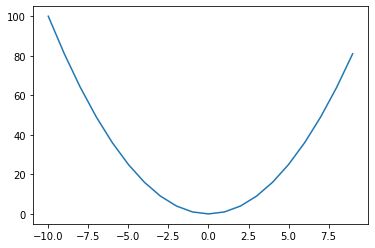

In [5]:
# f(x) = x ** 2
# x_new = x_old - a*(2*x_old)

x= np.arange(-10,10,1)
f_x = x ** 2

plt.plot(x, f_x)
plt.show()

In [6]:
x_new = 10
derivative = []
y = []
learng_rate= 0.1
for i in range(100):
    old_value = x_new
    derivative.append(old_value - learng_rate * 2 * old_value)
    x_new = old_value - learng_rate *2* old_value
    y.append(x_new ** 2)

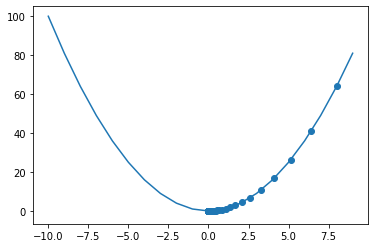

In [7]:
plt.plot(x, f_x)
plt.scatter(derivative, y)
plt.show()

In [8]:
def sin_function(x):
    return x * np.sin(x ** 2) + 1

def derivitive_f(x):
    return np.sin(x**2) + 2 * (x **2) * np.cos(x ** 2)

In [9]:
x= np.arange(-3,3,0.001)
f_x = sin_function(x)

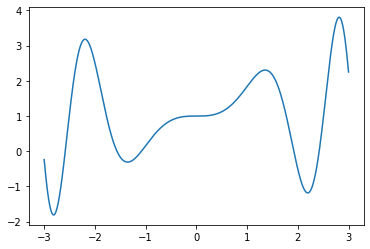

In [10]:
plt.plot(x, f_x)
plt.show()

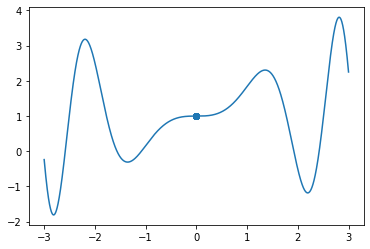

In [11]:
derivative = []
y = []
learng_rate= 0.01
for i in range(10000):
    old_value = x_new
    x_new = old_value - learng_rate * derivitive_f(old_value)
    derivative.append(x_new)
    y.append(sin_function(x_new))

plt.plot(x, f_x)
plt.scatter(derivative, y)
plt.show()

#### Linear Regression with Gradient Descent

1. 임의의 $ \theta_0,\theta_1 $으로 초기화  
2. Cost function J($\theta_0,\theta_1$)이 최소화 될때까지 학습  
3. 더 이상 Cost function이 줄어들지 않거나, 학습 횟수를 초과하면 종료  
4. lteration 1회에 1번 parameter update  
5. 최적값에 수렴하지 않을 수 있다.

In [14]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
        
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

#### Multivariate Linear Regression

In [15]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [ ]:
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 3))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = random.uniform(0, 1) * variance + i
        x[i][1] = random.uniform(0, 1) * variance + i
        x[i][2] = 1
        # our target variable
        y[i] = (i+bias) + random.uniform(0, 1) * variance + 500
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = gen_data(100, 25, 10)

plt.plot(x[:, 0:1], "ro")
plt.plot(y, "bo")

plt.show()

#### Linear Regression - Performance measure

In [16]:
# Mean Absolute Error(MAE)
# 잔차의 절댓값의 합
from sklearn.metrics import median_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

median_absolute_error(y_true, y_pred)

0.5

In [19]:
# Mean Squared Error(MSE)
# 잔차 제곱의 sum
from sklearn.metrics import mean_squared_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mean_squared_error(y_true, y_pred)

0.375

In [18]:
# R squared
# 0에서 1 사이 수로 1에 가까울 수록 높은 적합성
from sklearn.metrics import r2_score

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

r2_score(y_true, y_pred)

0.9486081370449679

* training set과 test set을 분리
    - training set으로 test를 할 경우 training set에 과도하게 fitting된 모델 가능성
    - 모델을 새로운 데이터 처리가 가능하도록 generalize되어야함

* Holdout Method(sampling)
    - 데이터를 training과 test로 나누어서 모델을 생성하고 테스트하는 기법
    - training과 test를 나누는 비율은 데이터의 크기에 따라 다름
    - 일반적으로 training data 2/3, test data 1/3을 활용

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Linear Regression with scikit-learn